# How to run

1. Create a folder next to the current notebook named `data`
2. Put all the files of the same simulation using the same prefix, for example `5mm` followed by the specific flow, as `.txt` files

Example: 
`5mm_100.txt`, `5mm_150.txt`, `5mm_200.txt`, ...

# Start up
Run the following cell to load the necessary functions

`extractData` will load all the files with the same prefix, e.g. `5mm` and create a table with the 
- `flow` extracted from the filename
- `mean` 
- `min` minimum value of the time series
- `std` standard deviation
- `skewness` skewness of the time series

you can execute it like this
> table = extractData('5mm')

You can eventually save it with 
> table.to_csv('filename.csv')


`plotCumulative` and `plotProbability` will automatically create the plot files for a specific file e.g. 

> plotProbability('5mm_100.txt')

will create the plot for the `5mm_100.txt` file


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

def extractTimes(filename):
    distance = 4.68/2
    data = pd.read_csv('data/'+filename, header=None).drop(columns=[0]).T
    times=data.iloc[::3,0]
    positions = data.iloc[1::3].set_index(times)
    radius = data.iloc[2, ::]
    low = abs(positions+distance).idxmin()
    high = abs(positions-distance).idxmin()
    time = high-low
    min = time.mode()[0]
    times = pd.DataFrame(list(zip(time, radius.round(2))), columns=['time', 'radius'])
    return times[times['time'] >= min]


def extractData(filepre):
    from scipy.stats import skew
    df = pd.DataFrame()

    for file in os.listdir("data"):
        if file.startswith(filepre):
            print(file)
            flow = file.replace(filepre,'').replace('.txt','').replace('.csv', '').lstrip('_')            
            times = extractTimes(file).drop(columns=['radius'])
            min = times.mode()[0]
            mean = times.mean()
            std = times.std()
            skw = skew(times.dropna())
            df = pd.concat([df, pd.DataFrame([[flow, mean, min, std, skw ]])])
                
    df = df.rename(columns={0:'flow', 1:'mean', 2:'minimum', 3:'stdev', 4:'skewness' }).set_index('flow')
    df.index = pd.to_numeric(df.index, errors='coerce')
    return df.sort_index()


def plotProbability(filename):
    times = extractTimes(filename).drop(columns=['radius'])
    sns.histplot(times, stat='probability')
    plt.xlabel('Time (s)')
    plt.ylabel('Probability')
    
def plotCumulative(filename):
    times = extractTimes(filename).drop(columns=['radius'])

    sns.histplot(times, stat='percent', cumulative=True)
    plt.xlabel('Time (s)')
    plt.ylabel('Cumulative %')
    
def plotRadius(filename):
    times = extractTimes(filename)

    sns.lineplot(x='radius', y='time', data=times.groupby('radius').mean())
    plt.xlabel('Radius (m)')
    plt.ylabel('Time (s)')

In [29]:
extractTimes('byron.txt')

(           time  radius
 Unnamed 0   NaN     NaN
 3           NaN     NaN,
 0.39)

<Axes: xlabel='radius', ylabel='time'>

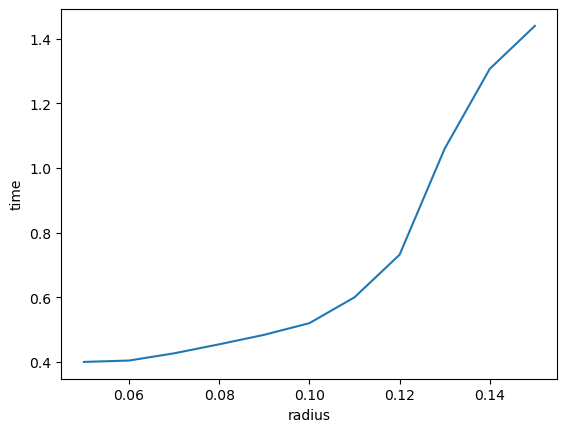

In [9]:
data = pd.read_csv('data/byron.txt', header=None).drop(columns=[0]).T
distance = 4.68/2
times=data.iloc[::3,0]
positions = data.iloc[1::3].set_index(times)
radius = data.iloc[2, ::]
low = abs(positions+distance).idxmin()
high = abs(positions-distance).idxmin()
time = high-low
min = time.mode()[0]
df = pd.DataFrame(list(zip(time, radius.round(2))), columns=['time', 'radius'])
df = df[df['time'] >= min]
sns.lineplot(x='radius', y='time', data=df.groupby('radius').mean())

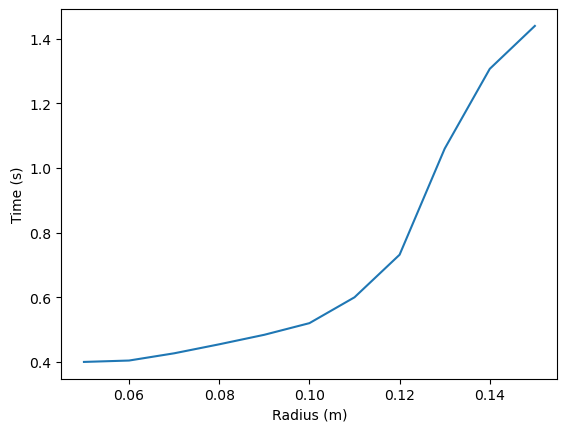

In [28]:
plotRadius('byron.txt')